In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import shap

In [103]:
# Cargar datos (asegurarse de tener la ruta correcta para tu archivo)
df = pd.read_csv('synthetic_data_stress_level.csv')

# Ver las primeras filas del dataframe
df.head()

,Número de materias actuales,Horas dedicadas a estudio por semana,Número de proyectos en curso,Complejidad de proyectos en curso,Entiende los temas,Ha sentido aislamiento de los demás,Ha sentido decepción por otros,Ha sentido constante competencia con compañeros esta semana,Ha tenido oportunidad de hablar de sus problemas con alguien esta semana,Ha sentido incómodo durante experiencias sociales,...,Horas de sueño promedio por noche,Número de comidas diarias,Frecuencia de actividad física por semana,Horas de uso de redes sociales por día,Frecuencia de dolor de cabeza,Frecuencia de migrañas,Frecuencia de problemas de digestión,Frecuencia de rigidez y calambres musculares,Frecuencia de temblores,Nivel de Estrés
0,6,10.535664,2,5,2,Sí,Sí,No,Sí,Sí,...,6.873692,5,3,6.050941,5,3,0,4,6,Bajo
1,7,16.940900,3,3,5,Sí,Sí,Sí,Sí,Sí,...,8.223860,4,0,6.107267,1,5,2,1,5,Bajo
2,5,20.000000,1,5,3,No,No,Sí,No,Sí,...,4.000000,5,4,4.771050,6,3,3,6,0,Alto
3,7,28.212326,3,1,3,No,Sí,Sí,Sí,Sí,...,5.961858,5,1,1.130437,6,4,6,1,5,Alto
4,7,16.329697,1,5,1,Sí,No,No,Sí,No,...,7.967022,2,3,5.806310,4,5,3,2,2,Medio


In [104]:
# Estadísticas descriptivas
df.describe()

,Número de materias actuales,Horas dedicadas a estudio por semana,Número de proyectos en curso,Complejidad de proyectos en curso,Entiende los temas,Frecuencia de consumo de sustancias psicoactivas por semana,Horas de sueño promedio por noche,Número de comidas diarias,Frecuencia de actividad física por semana,Horas de uso de redes sociales por día,Frecuencia de dolor de cabeza,Frecuencia de migrañas,Frecuencia de problemas de digestión,Frecuencia de rigidez y calambres musculares,Frecuencia de temblores
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,4.988000,19.044057,1.512000,3.005333,3.010667,3.004667,6.686986,3.496000,3.036667,3.094607,3.258000,3.043333,3.151333,2.951333,3.014667
std,1.435234,10.456079,1.119535,1.403312,1.407554,1.997491,1.563034,1.102782,1.998829,1.868651,1.986807,1.994018,2.033844,1.995232,1.989243
min,3.000000,5.000000,0.000000,1.000000,1.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,10.457896,1.000000,2.000000,2.000000,1.000000,5.556987,3.000000,1.000000,1.724302,1.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,18.432566,2.000000,3.000000,3.000000,3.000000,6.660943,3.000000,3.000000,3.016547,3.000000,3.000000,3.000000,3.000000,3.000000
75%,6.000000,25.815099,3.000000,4.000000,4.000000,5.000000,7.825120,4.000000,5.000000,4.414091,5.000000,5.000000,5.000000,5.000000,5.000000
max,7.000000,50.000000,3.000000,5.000000,5.000000,6.000000,10.000000,5.000000,6.000000,8.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [105]:
# Información de los tipos de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 26 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Número de materias actuales                                               1500 non-null   int64  
 1   Horas dedicadas a estudio por semana                                      1500 non-null   float64
 2   Número de proyectos en curso                                              1500 non-null   int64  
 3   Complejidad de proyectos en curso                                         1500 non-null   int64  
 4   Entiende los temas                                                        1500 non-null   int64  
 5   Ha sentido aislamiento de los demás                                       1500 non-null   object 
 6   Ha sentido decepción por otros                                  

In [106]:
# Revisión de valores faltantes
df.isnull().sum()

Número de materias actuales                                                 0
Horas dedicadas a estudio por semana                                        0
Número de proyectos en curso                                                0
Complejidad de proyectos en curso                                           0
Entiende los temas                                                          0
Ha sentido aislamiento de los demás                                         0
Ha sentido decepción por otros                                              0
Ha sentido constante competencia con compañeros esta semana                 0
Ha tenido oportunidad de hablar de sus problemas con alguien esta semana    0
Ha sentido incómodo durante experiencias sociales                           0
Ha sentido preocupación o nerviosismo esta semana                           0
Ha sentido sentimientos de depresión y tristeza esta semana                 0
Ha sentido problemas para concentrarse esta semana              

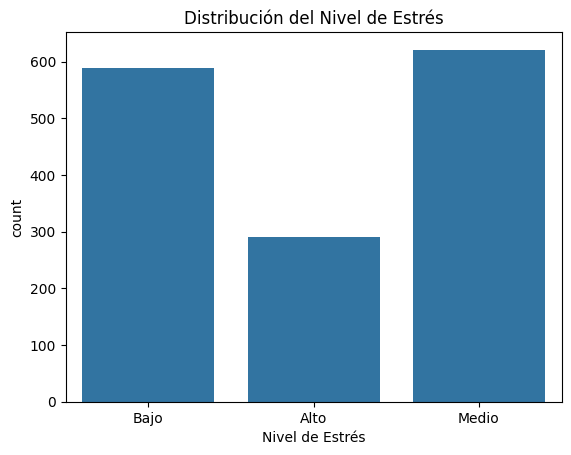

In [107]:
# Distribución de la variable "Nivel de Estrés"
sns.countplot(x='Nivel de Estrés', data=df)
plt.title('Distribución del Nivel de Estrés')
plt.show()

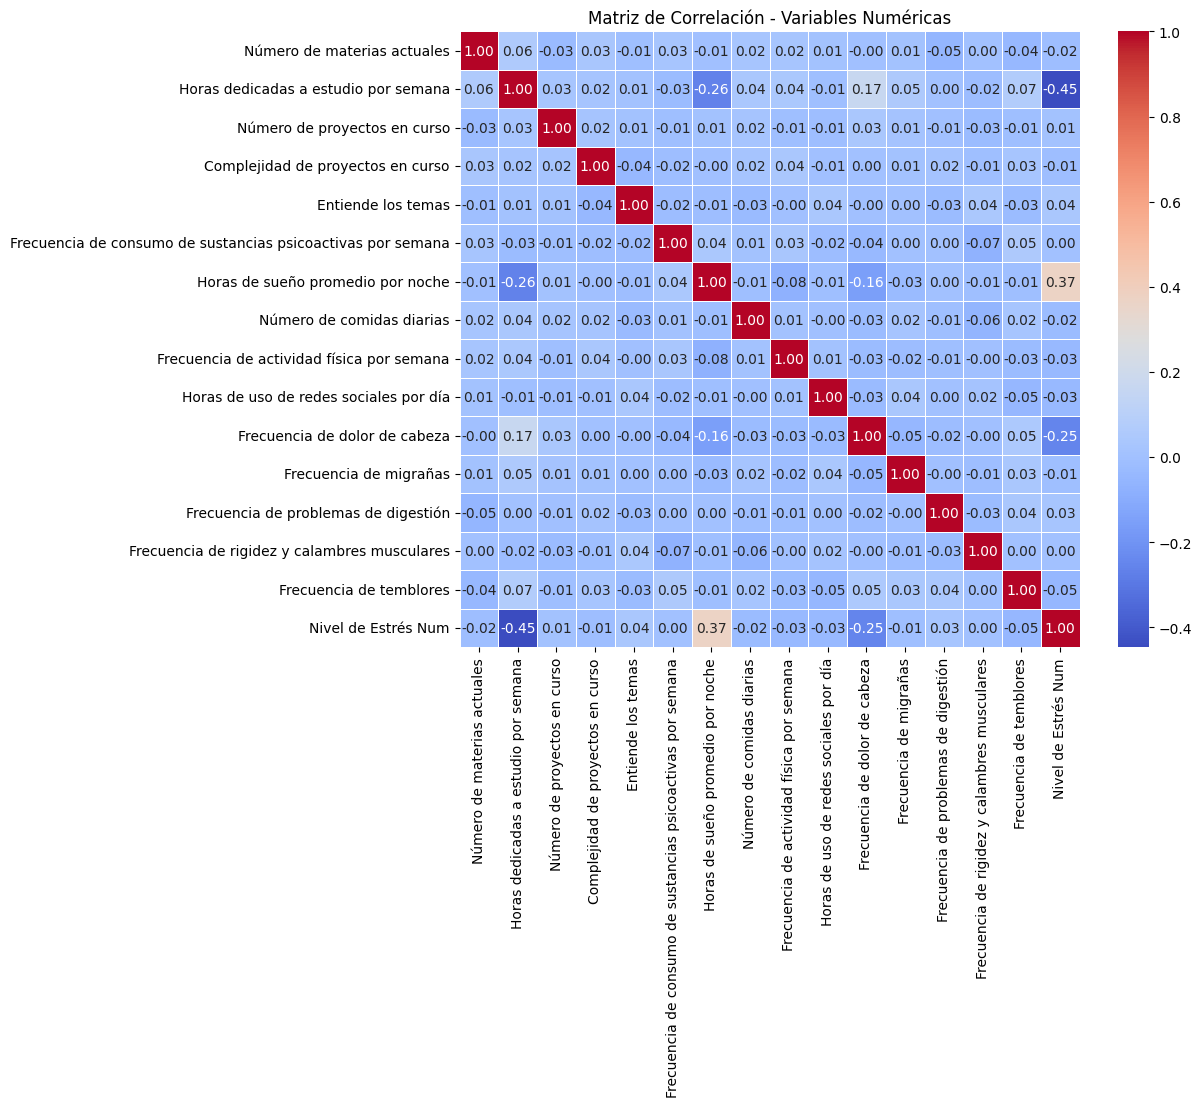

In [108]:
# Convertir la variable 'Nivel de Estrés' a numérica
le = LabelEncoder()
df['Nivel de Estrés Num'] = le.fit_transform(df['Nivel de Estrés'])

# Calcular la matriz de correlación
# Calcular la matriz de correlación solo para las variables numéricas
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()

In [109]:
df = df.drop('Nivel de Estrés Num', axis=1)

In [110]:
# Normalización de características numéricas
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [111]:
# Ejemplo para codificar columnas binarias 'Sí'/'No' como 1/0
df['Ha sentido aislamiento de los demás'] = df['Ha sentido aislamiento de los demás'].map({'Sí': 1, 'No': 0})
df['Ha sentido decepción por otros'] = df['Ha sentido decepción por otros'].map({'Sí': 1, 'No': 0})
df['Ha sentido constante competencia con compañeros esta semana'] = df['Ha sentido constante competencia con compañeros esta semana'].map({'Sí': 1, 'No': 0})
df['Ha tenido oportunidad de hablar de sus problemas con alguien esta semana'] = df['Ha tenido oportunidad de hablar de sus problemas con alguien esta semana'].map({'Sí': 1, 'No': 0})
df['Ha sentido incómodo durante experiencias sociales'] = df['Ha sentido incómodo durante experiencias sociales'].map({'Sí': 1, 'No': 0})
df['Ha sentido preocupación o nerviosismo esta semana'] = df['Ha sentido preocupación o nerviosismo esta semana'].map({'Sí': 1, 'No': 0})
df['Ha sentido sentimientos de depresión y tristeza esta semana'] = df['Ha sentido sentimientos de depresión y tristeza esta semana'].map({'Sí': 1, 'No': 0})
df['Ha sentido problemas para concentrarse esta semana'] = df['Ha sentido problemas para concentrarse esta semana'].map({'Sí': 1, 'No': 0})
df['Ha sentido sentimiento de agresividad esta semana'] = df['Ha sentido sentimiento de agresividad esta semana'].map({'Sí': 1, 'No': 0})
df['Ha sentido dudas de su capacidad de afrontar retos'] = df['Ha sentido dudas de su capacidad de afrontar retos'].map({'Sí': 1, 'No': 0})
df['Nivel de Estrés'] = df['Nivel de Estrés'].map({'Bajo': 0, 'Medio': 1, 'Alto' : 2})


In [112]:
# Separar variables independientes (X) y la etiqueta (y)
X = df.drop(columns=['Nivel de Estrés'])
y = df['Nivel de Estrés']

# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Inicializar modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

# Entrenar los modelos y evaluar
results = {}
for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    
    # Guardar resultados
    results[name] = {
        'AUC': auc,
        'F1-Score (Macro)': report['macro avg']['f1-score'],
        'Precision (Macro)': report['macro avg']['precision'],
        'Recall (Macro)': report['macro avg']['recall']
    }

# Mostrar resultados
results_df = pd.DataFrame(results).T
print(results_df)

                          AUC  F1-Score (Macro)  Precision (Macro)  \
Random Forest        0.743925          0.614240           0.611036   
Logistic Regression  0.742207          0.593697           0.594251   
SVM                  0.763491          0.592584           0.609221   
KNN                  0.690057          0.533389           0.571619   
XGBoost              0.715764          0.608368           0.601325   

                     Recall (Macro)  
Random Forest              0.619992  
Logistic Regression        0.593643  
SVM                        0.581012  
KNN                        0.512259  
XGBoost                    0.616138  


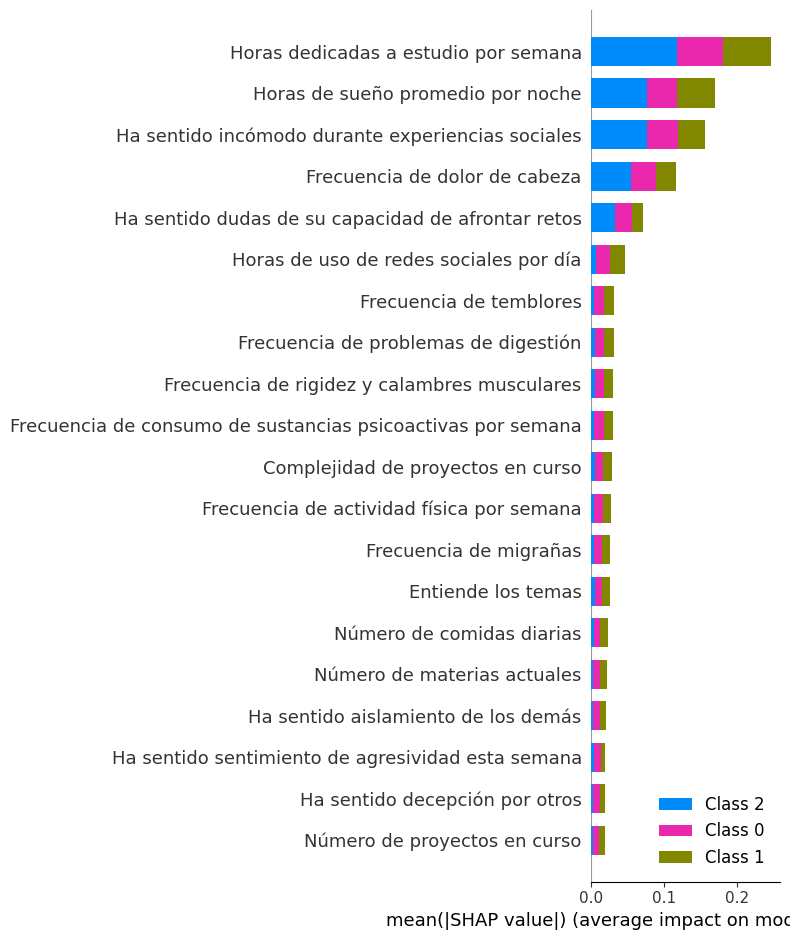

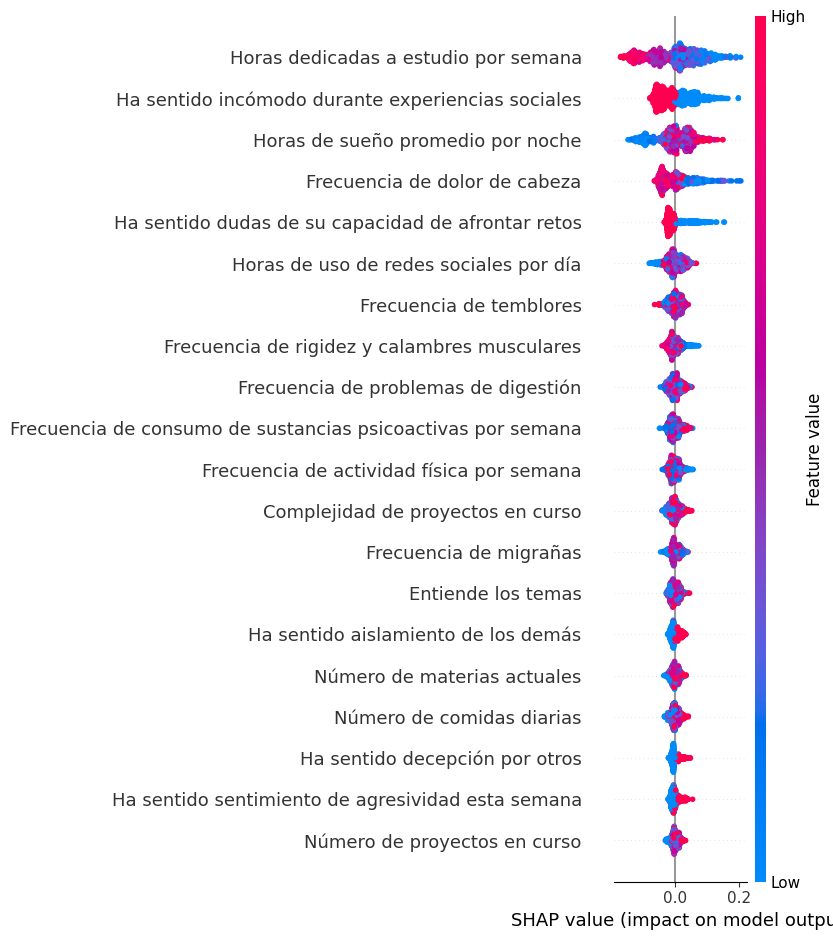

In [114]:
# Inicializar SHAP explainer
explainer = shap.TreeExplainer(models["Random Forest"])

# Calcular los valores SHAP
shap_values = explainer.shap_values(X_train)

# Resumen de las importancias de las características
shap.summary_plot(shap_values, X_train)

# Gráfico de importancia de características
shap.summary_plot(shap_values[0], X_train)
